# Prıprava dat
Zadanie: 
Načtěte dataset a ujistěte se, že rozumíte hodnotám ve sloupcích. Můžete změnit názvy sloupců a odstranit z nich mezery, což se vám může později hodit.

In [3]:
import pandas as pd

data = pd.read_csv("/Users/baskaklimek/Desktop/Python_pro_datascience/Python_pro_datovu_vedu/homework_one/data/adm_data.csv")

# Remove spaces from column names
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Rename columns (same convention)
column_mapping = {
    'Serial_No.': 'Serial_Number',
    'GRE_Score': 'GRE_Score',
    'TOEFL_Score': 'TOEFL_Score',
    'University_Rating': 'University_Rating',
    'SOP': 'SOP',
    'LOR_': 'LOR',
    'CGPA': 'CGPA',
    'Research': 'Research',
    'Chance_of_Admit_': 'Chance_of_Admit'
}
data.rename(columns=column_mapping, inplace=True)

# Check the new column names and first few rows of data
data.head(), data.columns

(   Serial_Number  GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  \
 0              1        337          118                  4  4.5  4.5  9.65   
 1              2        324          107                  4  4.0  4.5  8.87   
 2              3        316          104                  3  3.0  3.5  8.00   
 3              4        322          110                  3  3.5  2.5  8.67   
 4              5        314          103                  2  2.0  3.0  8.21   
 
    Research  Chance_of_Admit  
 0         1             0.92  
 1         1             0.76  
 2         1             0.72  
 3         1             0.80  
 4         0             0.65  ,
 Index(['Serial_Number', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
        'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
       dtype='object'))

Normálnost dat pro TOEFL skóre

1. Vypočítejte průměr a medián pro TOEFL skóre.
2. Vypočítejte směrodatnou odchylku.
3. Vytvořte histogram pro TOEFL skóre a nezapomeňte zobrazit odhadovanou křivku pravděpodobnostního rozdělení.
4. Otestujte, zda je TOEFL skóre vybráno z normálního rozdělení pomocí statistického testu. Uvažujte hladinu.

In [6]:
# Calculate Mean, Median
mean_toefl = data['TOEFL_Score'].mean()
median_toefl = data['TOEFL_Score'].median()

mean_toefl, median_toefl

(107.41, 107.0)

In [9]:
# Standard Deviation for TOEFL Score

std_toefl = data['TOEFL_Score'].std()
std_toefl_rounded = round(std_toefl, 2)

std_toefl_rounded

6.07

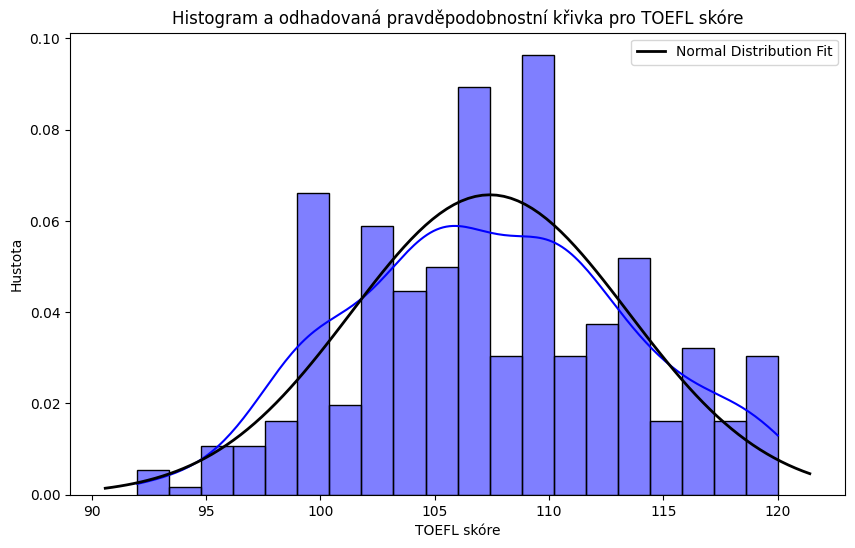

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

# Nastavení velikosti grafu
plt.figure(figsize=(10, 6))

# Vytvoření histogramu s KDE křivkou
sns.histplot(data['TOEFL_Score'], kde=True, stat='density', color='blue', bins=20)

# Přidání odhadované křivky normálního rozdělení
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_toefl, std_toefl)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')

# Přidání popisků
plt.title('Histogram a odhadovaná pravděpodobnostní křivka pro TOEFL skóre')
plt.xlabel('TOEFL skóre')
plt.ylabel('Hustota')
plt.legend()
plt.show()

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/Users/baskaklimek/Desktop/Python_pro_datascience/data/heart.csv")


# Prepare the data
X = data.drop(columns=["output"])
y = data["output"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the optimal K value
results = {}
for k in range(2, 24, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy

# Find optimal K values
optimal_k = [k for k, acc in results.items() if acc == max(results.values())]

print("Accuracy for different values of K:", results)
print("Optimal K values:", optimal_k)


Accuracy for different values of K: {2: 0.7582417582417582, 4: 0.7692307692307693, 6: 0.8351648351648352, 8: 0.8461538461538461, 10: 0.8021978021978022, 12: 0.8241758241758241, 14: 0.8131868131868132, 16: 0.8241758241758241, 18: 0.8461538461538461, 20: 0.8351648351648352, 22: 0.8351648351648352}
Optimal K values: [8, 18]
